In [1]:
import globals as gl
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import numpy as np
from vis import lineplot_roi_avg

plt.style.use('default')

Base directory found: /cifs/diedrichsen/data/Chord_exp/EFC_learningfMRI
Atlas directory found: /home/UWO/memanue5/Documents/GitHub/extension-flexion-chords/extension-flexion-chords/atlases


In [2]:
H = 'L'
rois = ['SMA', 'PMd', 'PMv', 'M1', 'S1', 'SPLa', 'SPLp', 'V1']
glm = 3

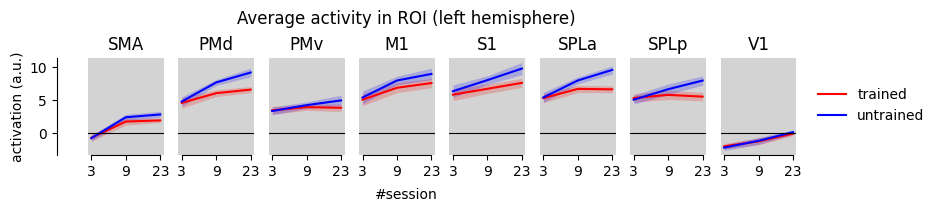

In [3]:
df = pd.read_csv(os.path.join(gl.baseDir, f'glm{glm}', f'ROI.con.avg.tsv'), sep='\t')
fig, axs = plt.subplots(1, len(rois), sharey=True, sharex=True, figsize=(8, 2), constrained_layout=True)
fig, axs = lineplot_roi_avg(fig, axs, df, metric='con', hue='chord', hue_order=['trained', 'untrained'], color=['red', 'blue'], label=['trained', 'untrained'],H=H, rois=rois)
#axs[0].set_ylim((-.5, 5.5))
axs[0].set_ylabel('activation (a.u.)')
fig.supxlabel('#session', fontsize=10)
fig.suptitle('Average activity in ROI (left hemisphere)')
plt.show()

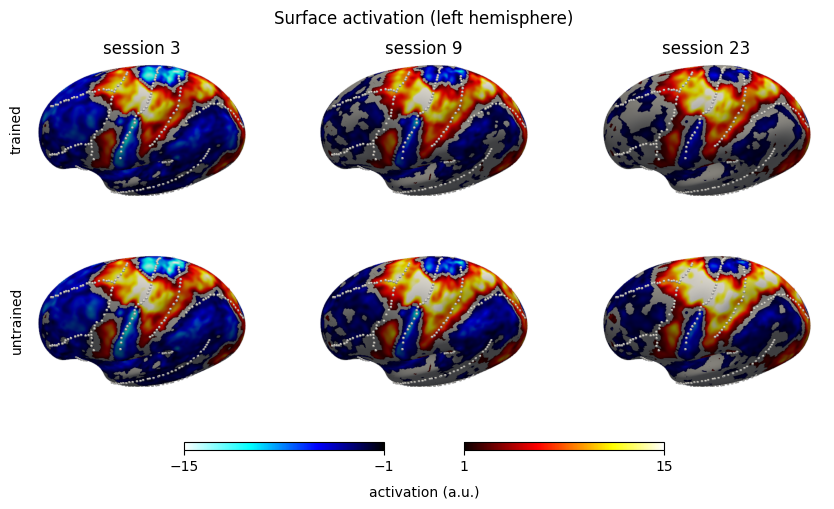

In [6]:
from imaging_pipelines.vis import plot_surf
from matplotlib.colors import LinearSegmentedColormap, Normalize
import nibabel as nb
from matplotlib.cm import ScalarMappable

cold_colors = [(0, 0, 0), (0, 0, 1), (0, 1, 1), (1, 1, 1)]  # RGB tuples
cold = LinearSegmentedColormap.from_list('cold_custom', cold_colors, N=128)
hot = plt.cm.hot(np.linspace(0, 1, 128))
cold_vals = cold(np.linspace(1, 0, 128))  # reversed
combined = np.vstack((cold_vals, hot))
cmap = LinearSegmentedColormap.from_list('coldhot', combined)

dtype = 'con'
thresh = 1
vmin, vmax = -15, 15
H = 'L'

cifti = nb.load(os.path.join(gl.baseDir, gl.surfDir, f'glm{glm}.con.session.smooth.dscalar.nii'))
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(8, 5), )
for gcol in range(6):
    row = 1 if gcol % 2 == 1 else 0
    col = gcol // 2
    ax = axs[row, col]
    fig, ax = plot_surf(fig, ax, cifti, H, cmap=cmap, col=gcol, thresh=thresh, vmin=vmin, vmax=vmax)

    if row==0:
        ax.set_title(f'session {gl.sessions[col]}')
        if col==0:
            ax.text(0, .5, 'trained', transform=ax.transAxes, rotation=90, ha='right', va='center')
    elif (row==1) & (col==0):
        ax.text(0, .5, 'untrained', transform=ax.transAxes, rotation=90, ha='right', va='center')

    cold_half = LinearSegmentedColormap.from_list("cold_half", combined[:128])
    hot_half = LinearSegmentedColormap.from_list("hot_half", combined[128:])

neg_norm = Normalize(vmin=vmin, vmax=-thresh)
sm_neg = ScalarMappable(norm=neg_norm, cmap=cold_half)
cax_neg = fig.add_axes([0.2, 0.1, 0.25, 0.015])
cbar_neg = fig.colorbar(sm_neg, ax=ax, cax=cax_neg, pad=0.01, orientation='horizontal')
cbar_neg.set_ticks([vmin, -thresh])
fig.supxlabel('activation (a.u.)', y=.001, fontsize=10)

pos_norm = Normalize(vmin=thresh, vmax=vmax)
sm_pos = ScalarMappable(norm=pos_norm, cmap=hot_half)
cax_pos = fig.add_axes([0.55, 0.1, 0.25, 0.015])
cbar_pos = fig.colorbar(sm_pos, ax=ax, cax=cax_pos, pad=0.01, orientation='horizontal')
cbar_pos.set_ticks([thresh, vmax])

fig.suptitle('Surface activation (left hemisphere)')

plt.subplots_adjust(left=0, right=1, bottom=.2, top=.9)

plt.show()

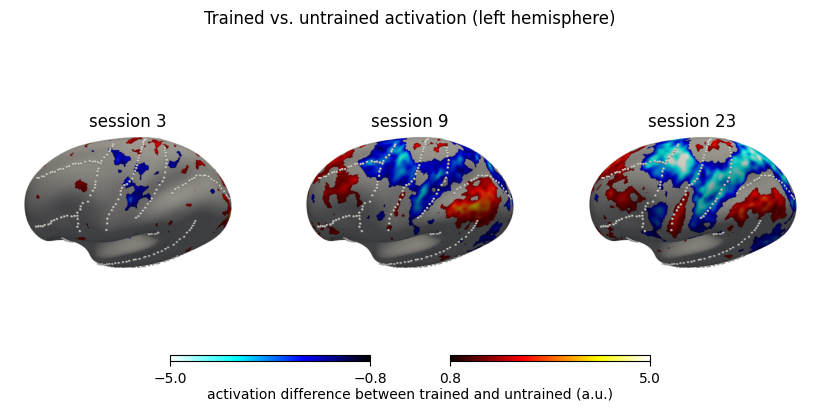

In [5]:
vmin, vmax = -5, 5
thresh = .8
cifti = nb.load(os.path.join(gl.baseDir, gl.surfDir, f'glm{glm}.con.trained_vs_untrained.smooth.dscalar.nii'))
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(8, 4), )
for col in range(3):
    ax = axs[col]
    fig, ax = plot_surf(fig, ax, cifti, H, cmap=cmap, col=col, thresh=thresh, vmin=vmin, vmax=vmax)

    ax.set_title(f'session {sess[col]}')

    cold_half = LinearSegmentedColormap.from_list("cold_half", combined[:128])
    hot_half = LinearSegmentedColormap.from_list("hot_half", combined[128:])

neg_norm = Normalize(vmin=vmin, vmax=-thresh)
sm_neg = ScalarMappable(norm=neg_norm, cmap=cold_half)
cax_neg = fig.add_axes([0.2, 0.1, 0.25, 0.015])
cbar_neg = fig.colorbar(sm_neg, ax=ax, cax=cax_neg, pad=0.02, orientation='horizontal')
cbar_neg.set_ticks([vmin, -thresh])
fig.supxlabel('activation difference between trained and untrained (a.u.)', y=.001, fontsize=10)

pos_norm = Normalize(vmin=thresh, vmax=vmax)
sm_pos = ScalarMappable(norm=pos_norm, cmap=hot_half)
cax_pos = fig.add_axes([0.55, 0.1, 0.25, 0.015])
cbar_pos = fig.colorbar(sm_pos, ax=ax, cax=cax_pos, pad=0.02, orientation='horizontal')
cbar_pos.set_ticks([thresh, vmax])

fig.suptitle('Trained vs. untrained activation (left hemisphere)')

plt.subplots_adjust(left=0, right=1, bottom=.1, top=.9)

plt.show()